**hack to set root dir due to some abspath issues with rllib**

In [35]:
import os

os.chdir("/Users/ulrikah/fag/thesis/rave")

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from rave.sound import Sound
from rave.analyser import Analyser
from rave.constants import KSMPS, SAMPLE_RATE

In [76]:
dry = "rave/input_audio/noise.wav"
# wet = "rave/bounces/2021-03-23_10-17-19_459471_render_dist_lpf_noise.wav" # has better reward score
wet = "rave/bounces/2021-03-18_13-46-40_469250_render_dist_lpf_noise.wav" # sound better, but has lower reward

target = "rave/input_audio/amen_trim.wav"

feature_extractors = ["rms", "pitch", "spectral"]

## Retrieve the features

In [77]:
analyser = Analyser(feature_extractors)

dry_sound = Sound(dry)
wet_sound = Sound(wet)
target_sound = Sound(target)
sounds = [dry_sound, wet_sound, target_sound]
for sound in sounds:
    sound.prepare_to_render(analyser=analyser)
    sound.features = []
    
features = [dry_features, wet_features, target_features]

done = False

while not done:
    for sound in sounds:
        done = done or sound.render()
        channel_values = sound.player.get_channels(analyser.analysis_features)
        sound.features.append(channel_values)
print("Number of feature vectors", [len(s.features) for s in sounds])
print("(sr / ksmps) * duration", (SAMPLE_RATE / KSMPS) * sounds[0].duration)


Number of feature vectors [362, 362, 362]
(sr / ksmps) * duration 361.04882812499994


## Visualise the features

In [78]:
# numpyify
for sound in sounds:
    sound.features = np.array(sound.features)

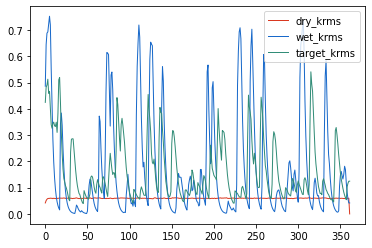

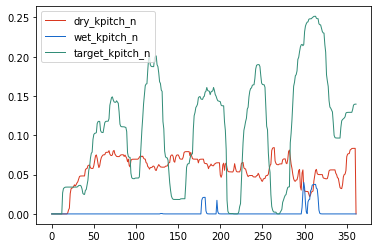

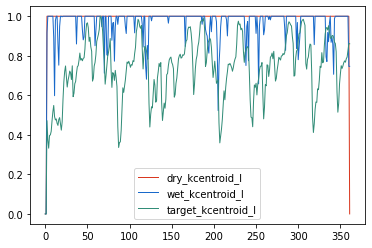

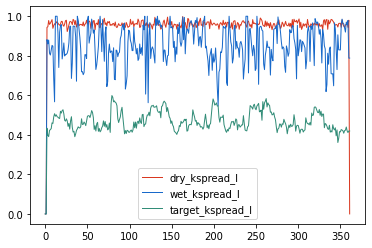

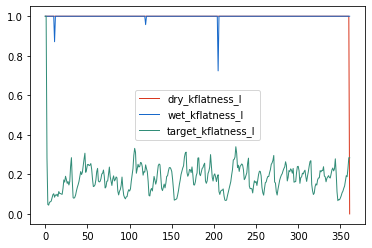

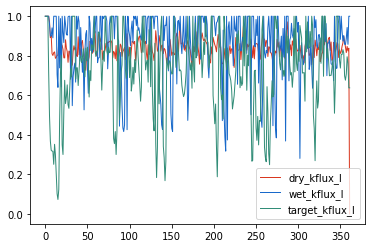

In [79]:

sound_names = ["dry", "wet", "target"]
sound_colors = [
    np.array([0.85181538, 0.22025192, 0.12469306]), 
    np.array([0.0950709 , 0.41044936, 0.79145089]),
    np.array([0.19786649, 0.55163671, 0.47055379])
]

for i, feature_name in enumerate(analyser.analysis_features):
    for j, sound in enumerate(sounds):
        feature = sound.features[:,i]
        plt.plot(feature, c=sound_colors[j], label=f"{sound_names[j]}_{feature_name}", linewidth=1, markersize=12)
    plt.legend()
    plt.show()